<a href="https://colab.research.google.com/github/unseen-nayan/colab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Expected Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring performance for Bucket Sort...
Size: 100, Time: 0.000118 seconds
Size: 500, Time: 0.000582 seconds
Size: 1000, Time: 0.001622 seconds
Size: 2000, Time: 0.002408 seconds
Size: 5000, Time: 0.007816 seconds
Size: 10000, Time: 0.014514 seconds
Size: 20000, Time: 0.030464 seconds
Size: 50000, Time: 0.191541 seconds


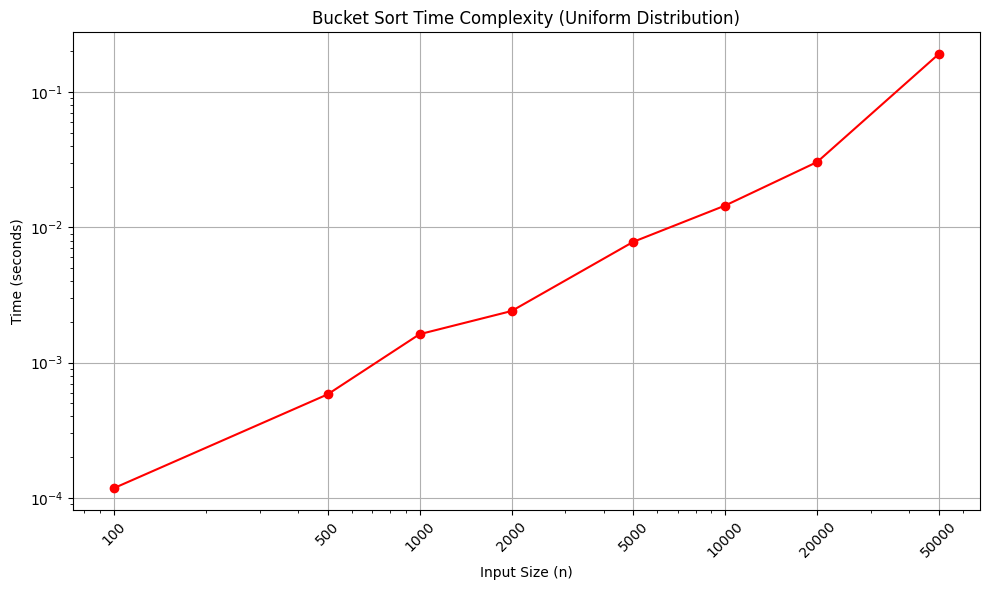

In [16]:
import time
import matplotlib.pyplot as plt
import random

def bucket_sort(arr):
    """
    Performs Bucket Sort on a list of numbers.
    This implementation assumes numbers are uniformly distributed in [0, 1).
    For integers, it can be adapted by scaling or using a fixed number of buckets.
    Here, we'll adapt for the given sample input range.
    """
    if not arr:
        return []

    # Determine the number of buckets. A common heuristic is sqrt(n) or n/k
    # For simplicity and given the integer nature, we'll determine max/min to normalize.
    max_val = max(arr)
    min_val = min(arr)

    if max_val == min_val: # All elements are the same
        return arr

    # Number of buckets (e.g., 10 or based on range/size)
    num_buckets = len(arr) # Or some other reasonable number like 10
    buckets = [[] for _ in range(num_buckets)]

    # Place elements into buckets
    value_range = max_val - min_val + 1 # Include max_val
    for num in arr:
        # Normalize num to a 0-based index for buckets
        # This mapping can be tricky for general cases. A common way for integers
        # is to divide by range and multiply by num_buckets, then floor.
        # Let's use a simple approach for integer range directly mapping to bucket index.
        # bucket_idx = int((num - min_val) / value_range * num_buckets)

        # A simpler approach for integers if we know the approximate range
        # Distribute based on the value itself. For the sample, max is 9, min is 0.
        # If we have 10 buckets for 0-9, each bucket gets one number.

        # For the given sample input, let's use a mapping that distributes them
        # into a fixed number of buckets, then sort each bucket.

        # Let's assume we want to divide by 10 for simplicity or use max_val / num_buckets
        # For the sample [8,5,3,1,9,6,0,7,4,2,5], max is 9.
        # Let's say we create buckets based on max_val / num_buckets.
        # A common approach for integers is to make bucket_idx = num // bucket_size
        # Let's use max_val + 1 as the number of buckets for now, like counting sort for simplicity if range is small.
        # Or, we can use a more general approach.

        # Using a more generic approach: distribute across a fixed number of buckets
        # and then sort each bucket. This is more aligned with the description.
        bucket_index = min(int((num - min_val) / (max_val - min_val + 0.000001) * (num_buckets -1)), num_buckets - 1) # +0.000001 to handle max_val correctly
        buckets[bucket_index].append(num)

    # Sort each bucket and concatenate the results
    sorted_arr = []
    for bucket in buckets:
        bucket.sort() # Use an internal sort (e.g., Timsort in Python)
        sorted_arr.extend(bucket)
    return sorted_arr

# Sample Input
sample_input_bucket = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
sorted_output_bucket = bucket_sort(sample_input_bucket.copy())
print(f"Sample Input: {sample_input_bucket}")
print(f"Sample Output: {sorted_output_bucket}")
print(f"Expected Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]\n")

# --- Compute Running Time and Plot Graph ---

def measure_time_bucket(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())
    end_time = time.time()
    return end_time - start_time

# Generate various input sizes and measure time
sizes_bucket = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times_bucket = []
max_val_for_bucket = 10000 # Max value in the random arrays for bucketsort

print("Measuring performance for Bucket Sort...")
for n in sizes_bucket:
    # Generate a random list of size n with values up to max_val_for_bucket
    random_arr_bucket = [random.randint(0, max_val_for_bucket) for _ in range(n)]
    time_taken_bucket = measure_time_bucket(bucket_sort, random_arr_bucket)
    times_bucket.append(time_taken_bucket)
    print(f"Size: {n}, Time: {time_taken_bucket:.6f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes_bucket, times_bucket, marker='o', linestyle='-', color='r')
plt.title('Bucket Sort Time Complexity (Uniform Distribution)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(sizes_bucket, [str(s) for s in sizes_bucket], rotation=45)
plt.tight_layout()
plt.show()


Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

Measuring performance for Counting Sort...
Size: 100, Time: 0.000181 seconds
Size: 500, Time: 0.000283 seconds
Size: 1000, Time: 0.000324 seconds
Size: 2000, Time: 0.000396 seconds
Size: 5000, Time: 0.000706 seconds
Size: 10000, Time: 0.001198 seconds
Size: 20000, Time: 0.003233 seconds
Size: 50000, Time: 0.005068 seconds


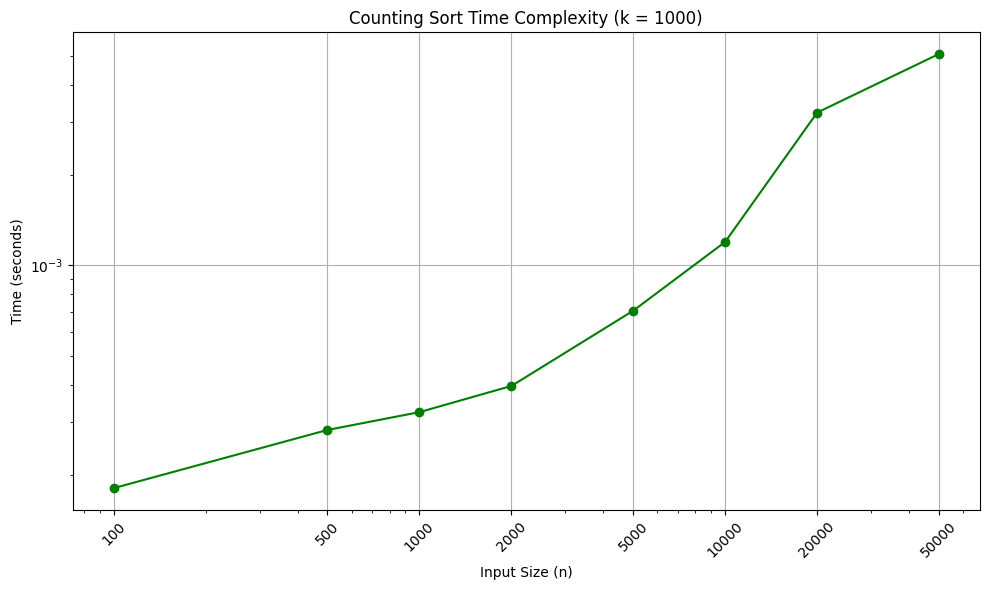

In [18]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort(arr):
    if not arr:
        return []

    # Find the maximum value in the input array to determine the range (k)
    max_val = max(arr)
    min_val = min(arr) # Counting sort typically works with non-negative integers, adjust for min_val if needed

    # Create a count array (buckets) initialized to zeros. Size k+1 for values from 0 to k.
    # Adjust for min_val if array contains negative numbers or starts above 0.
    # For this problem's context (0 to k), we assume non-negative.
    count = [0] * (max_val + 1)

    # Store count of each element
    for num in arr:
        count[num] += 1

    # Reconstruct the sorted array
    sorted_arr = []
    for i in range(max_val + 1):
        # Append 'i' to the sorted_arr 'count[i]' times
        sorted_arr.extend([i] * count[i])

    return sorted_arr

# Sample Input
sample_input_counting = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
sorted_output_counting = counting_sort(sample_input_counting.copy())
print(f"Sample Input: {sample_input_counting}")
print(f"Sample Output: {sorted_output_counting}")
print(f"Expected Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]\n")

# --- Compute Running Time and Plot Graph ---

def measure_time_counting(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())
    end_time = time.time()
    return end_time - start_time

# Generate various input sizes and measure time
sizes_counting = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times_counting = []

# k (range of values) for Counting Sort. Max value in random arrays.
# For Counting Sort, k directly impacts complexity, so we'll keep it relatively stable or grow it proportionally
# for a fair comparison to O(n+k).
max_val_k = 1000 # Example: numbers between 0 and 1000

print("Measuring performance for Counting Sort...")
for n in sizes_counting:
    # Generate a random list of size n with values up to max_val_k
    random_arr_counting = [random.randint(0, max_val_k) for _ in range(n)]
    time_taken_counting = measure_time_counting(counting_sort, random_arr_counting)
    times_counting.append(time_taken_counting)
    print(f"Size: {n}, Time: {time_taken_counting:.6f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes_counting, times_counting, marker='o', linestyle='-', color='g')
plt.title('Counting Sort Time Complexity (k = ' + str(max_val_k) + ')')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(sizes_counting, [str(s) for s in sizes_counting], rotation=45)
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Expected Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring performance for Radix Sort...
Size: 100, Time: 0.000373 seconds
Size: 500, Time: 0.001985 seconds
Size: 1000, Time: 0.003460 seconds
Size: 2000, Time: 0.004836 seconds
Size: 5000, Time: 0.012013 seconds
Size: 10000, Time: 0.025324 seconds
Size: 20000, Time: 0.056290 seconds
Size: 50000, Time: 0.392130 seconds


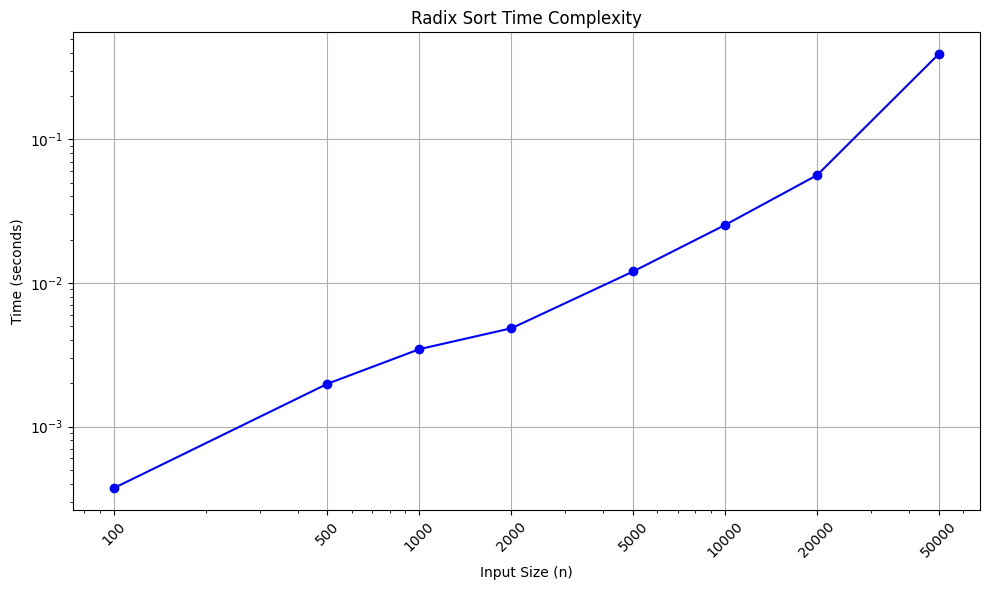

In [17]:
import time
import matplotlib.pyplot as plt
import random

def get_digit(number, place, base=10):
    return (number // (base ** place)) % base

def counting_sort_for_radix(arr, place, base=10):
    n = len(arr)
    output = [0] * n
    count = [0] * base

    # Store count of occurrences in count[]
    for i in range(n):
        index = get_digit(arr[i], place, base)
        count[index] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, base):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = get_digit(arr[i], place, base)
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr:
        return []

    max_val = max(arr)
    base = 10 # For decimal numbers

    # Do counting sort for every digit. Note that instead of passing digit number,
    # place is passed. place is 10^i where i is current digit number
    place = 0
    while (max_val // (base ** place)) > 0:
        counting_sort_for_radix(arr, place, base)
        place += 1
    return arr

# Sample Input
sample_input_radix = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
sorted_output_radix = radix_sort(sample_input_radix.copy())
print(f"Sample Input: {sample_input_radix}")
print(f"Sample Output: {sorted_output_radix}")
print(f"Expected Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]\n")

# --- Compute Running Time and Plot Graph ---

def measure_time_radix(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())
    end_time = time.time()
    return end_time - start_time

# Generate various input sizes and measure time
sizes_radix = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times_radix = []
max_val_for_radix = 100000 # Max value in the random arrays for radix sort (to ensure varying number of digits)

print("Measuring performance for Radix Sort...")
for n in sizes_radix:
    random_arr_radix = [random.randint(0, max_val_for_radix) for _ in range(n)]
    time_taken_radix = measure_time_radix(radix_sort, random_arr_radix)
    times_radix.append(time_taken_radix)
    print(f"Size: {n}, Time: {time_taken_radix:.6f} seconds")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes_radix, times_radix, marker='o', linestyle='-', color='b')
plt.title('Radix Sort Time Complexity')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(sizes_radix, [str(s) for s in sizes_radix], rotation=45)
plt.tight_layout()
plt.show()